# Retrieving Points of Interest from OpenStreetMaps

In [11]:
import overpy
import pandas as pd
import time

### template for data retrieval

--> in the following link:
    
    https://wiki.openstreetmap.org/wiki/OSMBD_Taglist
        
you can find all the OpenStreetMaps available keys and values

In [12]:
tag_key = 'amenity'
tag_value = 'restaurant'
state ='New York'


api = overpy.Overpass()

query_template = """[out:json];
                    area['is_in:state'='{0}'] -> .a;
                    way(area.a)[{1}{3}{2}]; out center; >; out;
                    relation(area.a)[{1}{3}{2}]; out center; >; out;
                    node(area.a)[{1}{3}{2}]; out;"""

print('\nGetting data for %s %ss: \n...' % (tag_key, tag_value))

pois_df = pd.DataFrame()

query = query_template.format(state, tag_key,
                              tag_value if tag_value != 'all' else '.',
                              '=' if tag_value != 'all' else '~')

while True:
    try:
        result = api.query(query)
        break
    except:
        print('   Too many API requests! \n   Waiting 10 secs...')
        time.sleep(10)



Getting data for amenity restaurants: 
...


--> After this query, which you could include inside a function, must play with 'ways', 'nodes', and 'relations' to actually find the geographical related information of each of the points of interest

In [14]:
result.ways

[<overpy.Way id=12284340 nodes=[957663394, 3050626911, 111338987, 2837620717, 111338998, 2837620718, 266034305, 2837620719, 2837620720, 2726301190, 265836288, 265837196, 2726301187, 265837244, 2726301184, 265837550, 265837553, 265838463, 265838632, 4716795138, 111339023, 264773612, 265837834, 2724970312, 2724970311, 2724970314]>,
 <overpy.Way id=45847646 nodes=[583498573, 583498574, 583498575, 583498576, 583498577, 583498578, 583498573]>,
 <overpy.Way id=51948217 nodes=[662571767, 662571771, 662571774, 662571780, 5404834473, 662571783, 5404834472, 662571787, 662571767]>,
 <overpy.Way id=56304130 nodes=[706394295, 1218275780, 706394288, 706394302, 706394304, 706394295]>,
 <overpy.Way id=56304133 nodes=[706394335, 706394345, 706394340, 706394338, 706394337, 706394336, 706394308, 706394306, 706394307, 706394311, 706394322, 706394318, 706394320, 706394335]>,
 <overpy.Way id=57740633 nodes=[715876287, 715876273, 715876301, 715876282, 715876287]>,
 <overpy.Way id=57740636 nodes=[715876285, 9

In [15]:
result.nodes

[<overpy.Node id=111338987 lat=42.8994199 lon=-78.8722709>,
 <overpy.Node id=111338998 lat=42.8994385 lon=-78.8739793>,
 <overpy.Node id=111339023 lat=42.8994780 lon=-78.8790839>,
 <overpy.Node id=111545753 lat=42.9476444 lon=-78.8544621>,
 <overpy.Node id=212852208 lat=43.4838971 lon=-75.3317062>,
 <overpy.Node id=264773612 lat=42.8994793 lon=-78.8791832>,
 <overpy.Node id=265836288 lat=42.8994630 lon=-78.8773383>,
 <overpy.Node id=265837196 lat=42.8994641 lon=-78.8774589>,
 <overpy.Node id=265837244 lat=42.8994661 lon=-78.8776944>,
 <overpy.Node id=265837550 lat=42.8994685 lon=-78.8779848>,
 <overpy.Node id=265837553 lat=42.8994691 lon=-78.8781460>,
 <overpy.Node id=265837834 lat=42.8994799 lon=-78.8792852>,
 <overpy.Node id=265838463 lat=42.8994710 lon=-78.8782692>,
 <overpy.Node id=265838632 lat=42.8994766 lon=-78.8789219>,
 <overpy.Node id=266034305 lat=42.8994460 lon=-78.8755387>,
 <overpy.Node id=347415307 lat=41.5296708 lon=-73.8924410>,
 <overpy.Node id=347415364 lat=41.527032

In [18]:
result.relations

[<overpy.Relation id=7895191>, <overpy.Relation id=8534263>]

--> After the query and accessing to all the information it has to offer, you can create a dataframe such as the following

In [21]:
pois_df

,id,latitude,longitude,name,point_type,tag_key,tag_value
0,12284340,42.899466,-78.874817,Allen Street,way,amenity,restaurant
1,45847646,41.639754,-73.920258,Bonefish Grill,way,amenity,restaurant
2,51948217,43.121353,-77.594105,Zebb's,way,amenity,restaurant
3,56304130,44.670023,-74.986522,First Crush,way,amenity,restaurant
4,56304133,44.670195,-74.986158,La Casbah,way,amenity,restaurant
5,57740633,42.714442,-73.814023,Chili's,way,amenity,restaurant
6,57740636,42.716904,-73.813756,The Barnsider,way,amenity,restaurant
7,57740638,42.714552,-73.813654,Hooter's,way,amenity,restaurant
8,57741872,42.624761,-73.699598,Cracker Barrel,way,amenity,restaurant
9,57741874,42.626062,-73.699759,Denny's,way,amenity,restaurant


# Working with GeoPandas

In [23]:
import geopandas as gpd
from shapely.geometry import Point
from geopandas.tools import sjoin

--> in order to create a GeoDataFrame, the original DataFrame must have a column named 'geometry' which includes information relative to coordinates

In [24]:
pois_df['geometry'] = pois_df.apply(lambda row: Point(row.longitude, row.latitude), axis=1)

--> when creating a GeoDataFrame from a DataFrame, important to explicitly specifiy the coordinate reference system used

In [25]:
pois_df = gpd.GeoDataFrame(pois_df, crs= "+init=epsg:4326")

In [26]:
pois_df

,id,latitude,longitude,name,point_type,tag_key,tag_value,geometry
0,12284340,42.899466,-78.874817,Allen Street,way,amenity,restaurant,POINT (-78.8748173 42.8994661)
1,45847646,41.639754,-73.920258,Bonefish Grill,way,amenity,restaurant,POINT (-73.92025769999999 41.6397544)
2,51948217,43.121353,-77.594105,Zebb's,way,amenity,restaurant,POINT (-77.5941048 43.121353)
3,56304130,44.670023,-74.986522,First Crush,way,amenity,restaurant,POINT (-74.9865221 44.6700233)
4,56304133,44.670195,-74.986158,La Casbah,way,amenity,restaurant,POINT (-74.9861576 44.6701953)
5,57740633,42.714442,-73.814023,Chili's,way,amenity,restaurant,POINT (-73.8140226 42.7144416)
6,57740636,42.716904,-73.813756,The Barnsider,way,amenity,restaurant,POINT (-73.8137562 42.7169039)
7,57740638,42.714552,-73.813654,Hooter's,way,amenity,restaurant,POINT (-73.81365359999999 42.7145524)
8,57741872,42.624761,-73.699598,Cracker Barrel,way,amenity,restaurant,POINT (-73.6995977 42.6247611)
9,57741874,42.626062,-73.699759,Denny's,way,amenity,restaurant,POINT (-73.6997585 42.6260616)


--> Reading shapefiles (following example with a New York City Zip Code shapefile)

In [27]:
newyorkcity = gpd.read_file('/home/alberttrias/Descargas/ZIP_CODE_040114.shp')

--> Change to same coordinate reference system

In [29]:
newyorkcity = newyorkcity.to_crs("+init=epsg:4326")

--> Can visualize results with plot()

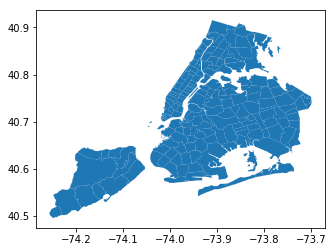

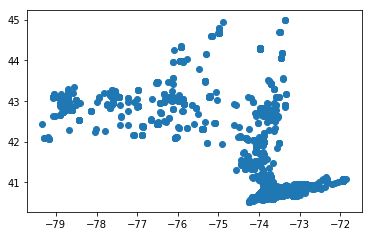

In [30]:
%matplotlib inline
newyorkcity.plot()
pois_df.plot()

### sjoin: spatial join

--> since you are intersted only in certain zip codes, can filter New York City shapefile for those desired zip codes and then do a spatial join. In doing so, will end up with only those points of interest that fall within those zip codes.

In [32]:
chosen_zip_codes = ['11368', '11226', '11373', '11385', '10467']

In [33]:
newyorkcity_filtered = newyorkcity[newyorkcity.ZIPCODE.isin(chosen_zip_codes)]

In [35]:
restaurants_within_codes = sjoin(newyorkcity_filtered, pois_df, how='left')

In [36]:
restaurants_within_codes

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,...,SHAPE_LEN,geometry,index_right,id,latitude,longitude,name,point_type,tag_key,tag_value
5,11226,0,Brooklyn,106132.0,3.940860e+07,NY,Kings,36,047,http://www.usps.com/,...,0.0,POLYGON ((-73.96190027968616 40.65487064531369...,374.0,2.497885e+08,40.635899,-73.962110,El Paso,way,amenity,restaurant
5,11226,0,Brooklyn,106132.0,3.940860e+07,NY,Kings,36,047,http://www.usps.com/,...,0.0,POLYGON ((-73.96190027968616 40.65487064531369...,3366.0,5.215083e+09,40.642915,-73.948916,YoYo Fritaville,node,amenity,restaurant
5,11226,0,Brooklyn,106132.0,3.940860e+07,NY,Kings,36,047,http://www.usps.com/,...,0.0,POLYGON ((-73.96190027968616 40.65487064531369...,3367.0,5.215083e+09,40.643456,-73.948943,Brooklyn Sidewalk Cafe,node,amenity,restaurant
5,11226,0,Brooklyn,106132.0,3.940860e+07,NY,Kings,36,047,http://www.usps.com/,...,0.0,POLYGON ((-73.96190027968616 40.65487064531369...,1998.0,2.566373e+09,40.643456,-73.948943,Brooklyn Sidewalk Cafe,node,amenity,restaurant
5,11226,0,Brooklyn,106132.0,3.940860e+07,NY,Kings,36,047,http://www.usps.com/,...,0.0,POLYGON ((-73.96190027968616 40.65487064531369...,2864.0,4.326740e+09,40.647005,-73.958413,Island Express,node,amenity,restaurant
5,11226,0,Brooklyn,106132.0,3.940860e+07,NY,Kings,36,047,http://www.usps.com/,...,0.0,POLYGON ((-73.96190027968616 40.65487064531369...,1886.0,2.473724e+09,40.650219,-73.958004,Sybil's Bakery & Restaurant,node,amenity,restaurant
5,11226,0,Brooklyn,106132.0,3.940860e+07,NY,Kings,36,047,http://www.usps.com/,...,0.0,POLYGON ((-73.96190027968616 40.65487064531369...,2763.0,4.151456e+09,40.654035,-73.949057,Red Rooster Harlem,node,amenity,restaurant
5,11226,0,Brooklyn,106132.0,3.940860e+07,NY,Kings,36,047,http://www.usps.com/,...,0.0,POLYGON ((-73.96190027968616 40.65487064531369...,2298.0,3.144821e+09,40.655209,-73.956512,Gandhi Fine Indian Cuisine,node,amenity,restaurant
5,11226,0,Brooklyn,106132.0,3.940860e+07,NY,Kings,36,047,http://www.usps.com/,...,0.0,POLYGON ((-73.96190027968616 40.65487064531369...,1942.0,2.549891e+09,40.655842,-73.960080,Family Pizza,node,amenity,restaurant
5,11226,0,Brooklyn,106132.0,3.940860e+07,NY,Kings,36,047,http://www.usps.com/,...,0.0,POLYGON ((-73.96190027968616 40.65487064531369...,2304.0,3.153549e+09,40.640428,-73.965806,Corthaiyou,node,amenity,restaurant
